In [5]:
# importing libraries

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
# downloading dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir = data_dir / "flower_photos"

In [7]:
print(data_dir)

C:\Users\Aasim\.keras\datasets\flower_photos\flower_photos


In [8]:
print(list(data_dir.iterdir()))

[WindowsPath('C:/Users/Aasim/.keras/datasets/flower_photos/flower_photos/daisy'), WindowsPath('C:/Users/Aasim/.keras/datasets/flower_photos/flower_photos/dandelion'), WindowsPath('C:/Users/Aasim/.keras/datasets/flower_photos/flower_photos/LICENSE.txt'), WindowsPath('C:/Users/Aasim/.keras/datasets/flower_photos/flower_photos/roses'), WindowsPath('C:/Users/Aasim/.keras/datasets/flower_photos/flower_photos/sunflowers'), WindowsPath('C:/Users/Aasim/.keras/datasets/flower_photos/flower_photos/tulips')]


C:\Users\Aasim\.keras\datasets\flower_photos\flower_photos\roses\10503217854_e66a804309.jpg


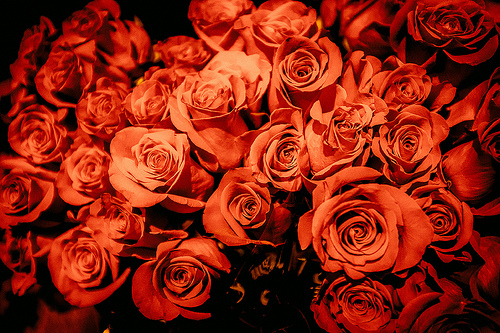

In [9]:
roses = list(data_dir.glob('roses/*.jpg'))
print(roses[2])
PIL.Image.open(str(roses[2]))

In [10]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [13]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
    image_size=(224, 224),  
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
    image_size=(224, 224), 
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Found 3670 files belonging to 5 classes.


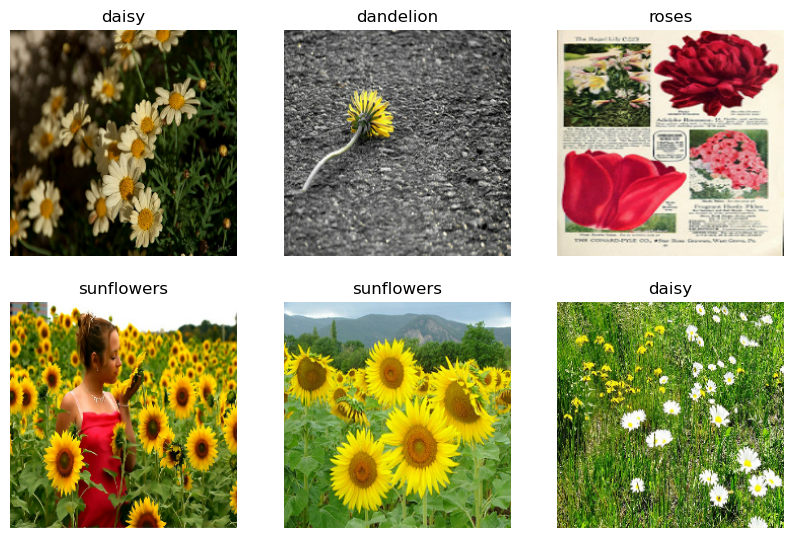

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [16]:
import tensorflow as tf

Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Flatten = tf.keras.layers.Flatten
ResNet50 = tf.keras.applications.ResNet50


In [17]:
# model training

resnet_model = Sequential()

pretrained_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [18]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,971,013 (285.99 MB)

 Trainable params: 51,383,301 (196.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [19]:
resnet_model.compile(optimizer=Adam(learning_rate
=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
     

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.6605 - loss: 24.6811 - val_accuracy: 0.9324 - val_loss: 0.4855
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 500s 4s/step - accuracy: 0.9330 - loss: 0.5066 - val_accuracy: 0.9796 - val_loss: 0.0869
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9795 - loss: 0.1094 - val_accuracy: 0.9910 - val_loss: 0.0370
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.9902 - loss: 0.0481 - val_accuracy: 0.9965 - val_loss: 0.0135
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9949 - loss: 0.0268 - val_accuracy: 0.9891 - val_loss: 0.0675
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9935 - loss: 0.0473 - val_accuracy: 0.9757 - val_loss: 0.1820
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9780 - loss: 0.1629 - val_accuracy: 0.9924 - val_loss: 0.0451
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9807 - loss: 0.1173 - val_acc

In [ ]:
# Evaluating The Model

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

In [ ]:
# making prediction

import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

In [ ]:
# fine tuning 

pretrained_model.trainable = True

for layer in pretrained_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

In [ ]:
# recompile

resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

In [ ]:
print(pretrained_model)
